In [1]:
import h5py
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3

(0.0, 1.6e-07)

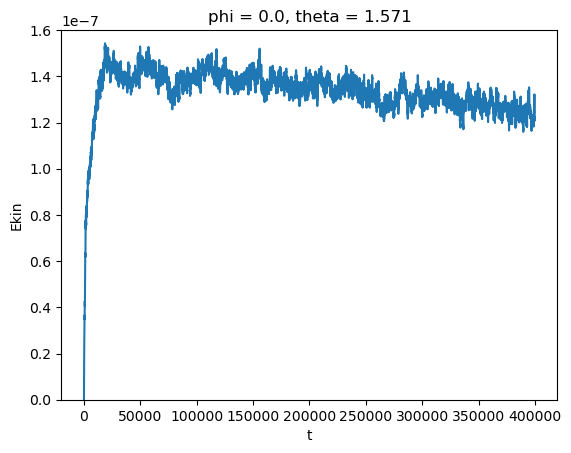

In [2]:
# looking at results and plot...
tasks = d3.load_tasks_to_xarray("scalar_data/scalar_data_s1.h5")
Ekin = tasks['Ekin'][:,0,0]
Ekin.plot()
plt.ylim([0,1.6e-7])

In [3]:
file = h5py.File('snapshots/snapshots_s1.h5','r')
dset  = file['tasks']
u = dset['u']
u_phi = u[:,0,:,:]
u_theta = u[:,1,:,:]

In [4]:
times = file['scales']['sim_time'][:]
phi = u.dims[2][0][:].ravel() 
theta = u.dims[3][0][:].ravel()
lat = (np.pi/2 - theta)*180/np.pi
lon = (phi - np.pi)*180/np.pi

In [5]:
u_phi_xmean = np.mean(u_phi,1)
du_phi = u_phi - u_phi_xmean[:, np.newaxis, :]
u_theta_xmean = np.mean(u_theta,1)
du_theta = u_theta - u_theta_xmean[:, np.newaxis, :]
transport_mean = -u_phi_xmean * u_theta_xmean
transport_prime = -du_phi * du_theta
transport_prime = np.mean(transport_prime,1)

Text(0.5, 1.0, 'zonal mean zonal velocity')

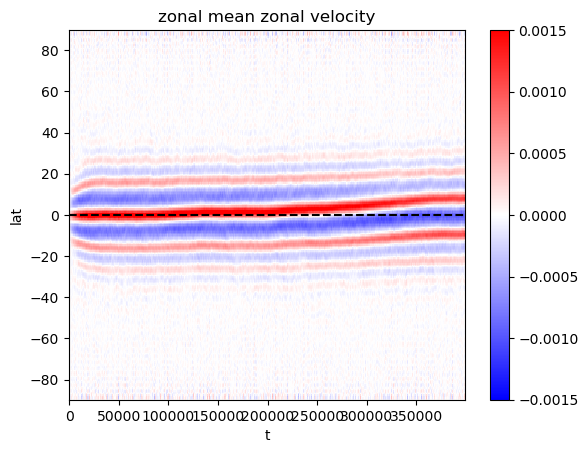

In [6]:
plt.pcolor(times,lat,u_phi_xmean.transpose(),cmap='bwr')
plt.plot(times,times*0,color='k',linestyle='--')
plt.clim([-0.0015,0.0015])
plt.colorbar()
plt.ylabel('lat')
plt.xlabel('t')
plt.title('zonal mean zonal velocity')

Text(0.5, 1.0, 'zonal velocity snapshot')

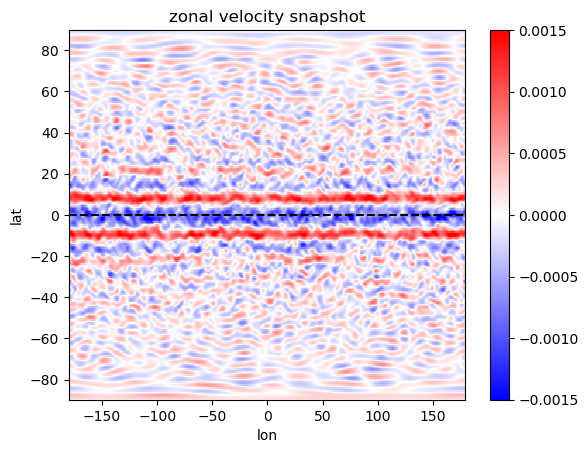

In [7]:
plt.pcolor(lon,lat,u_phi[-1,:,:].transpose(),cmap='bwr')
plt.plot(lon,lon*0,color='k',linestyle='--')
plt.clim([-0.0015,0.0015])
plt.colorbar()
plt.ylabel('lat')
plt.xlabel('lon')
plt.title('zonal velocity snapshot')

Text(0.5, 1.0, "$\\overline{u' \\cdot v'}$")

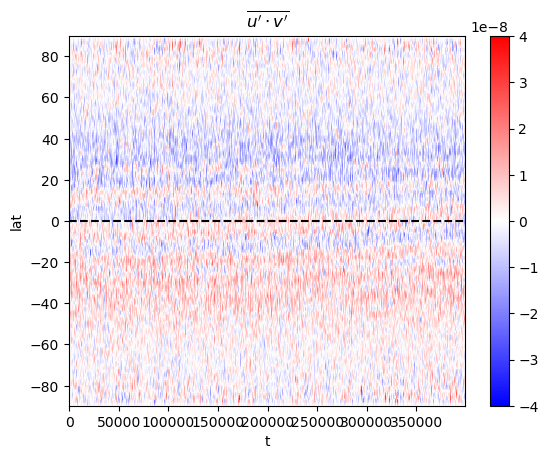

In [8]:
plt.pcolor(times,lat,transport_prime.transpose(),cmap='bwr')
plt.plot(times,times*0,color='k',linestyle='--')
plt.clim([-4e-8,4e-8])
plt.colorbar()
plt.ylabel('lat')
plt.xlabel('t')
plt.title('$\overline{u\' \cdot v\'}$')

Text(0.5, 1.0, '$ \\overline{u} \\cdot \\overline{v} $')

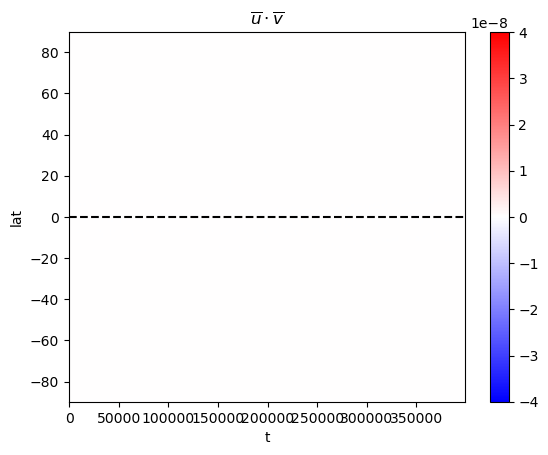

In [9]:
plt.pcolor(times,lat,transport_mean.transpose(),cmap='bwr')
plt.plot(times,times*0,color='k',linestyle='--')
plt.clim([-4e-8,4e-8])
plt.colorbar()
plt.ylabel('lat')
plt.xlabel('t')
plt.title('$ \overline{u} \cdot \overline{v} $')

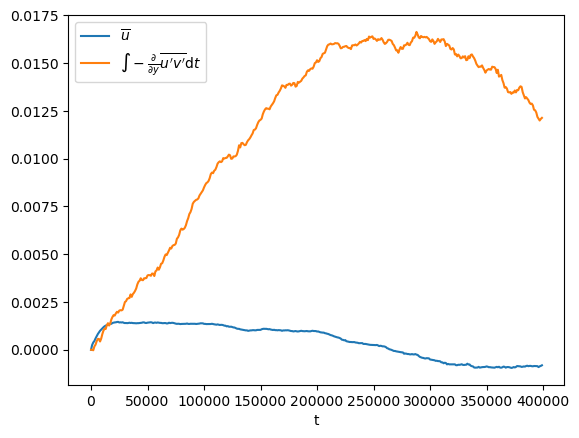

In [10]:
ny = 3
u_eq = np.mean(u_phi_xmean[:,128-ny:128+ny],1)
dtransport_prime = transport_prime[:,128+ny] - transport_prime[:,128-ny]
dy = (lat[128+ny] - lat[128-ny]) * np.pi/180
duv_dy_prime_eq = dtransport_prime/dy
u_eq_reynold = u_eq.copy()
for i in range(1,len(u_eq)):
    u_eq_reynold[i] = u_eq[0] - np.mean(duv_dy_prime_eq[:i])*times[i]

plt.plot(times,u_eq)
plt.plot(times,u_eq_reynold)
plt.xlabel('t')
plt.legend(['$\overline{u}$','$\\int - \\frac{\partial}{\partial y} \overline{u\'v\'} \\mathrm{d} t $'])

(0.0, 400000.0)

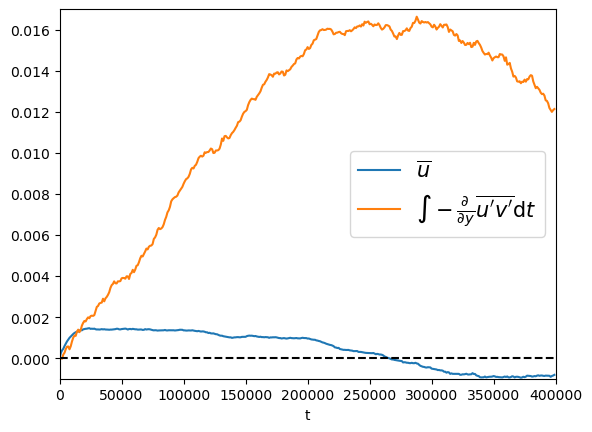

In [15]:
plt.plot(times,u_eq)
plt.plot(times,u_eq_reynold)
plt.plot(times,times*0,color='k',linestyle='--')
plt.xlabel('t')
plt.legend(['$\overline{u}$','$\\int - \\frac{\partial}{\partial y} \overline{u\'v\'} \\mathrm{d} t $'],fontsize=15)
plt.ylim([-0.001,0.017])
plt.xlim([0,400000])

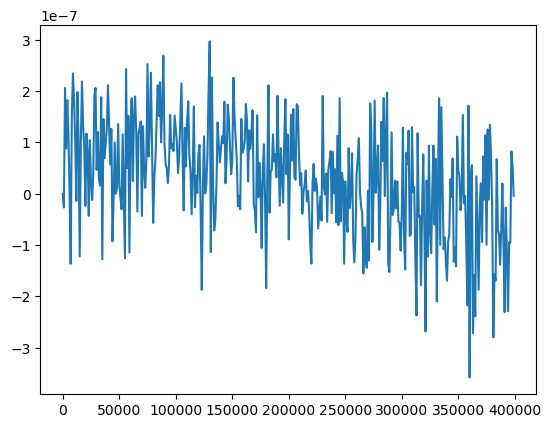

In [11]:
plt.plot(times,-duv_dy_prime_eq)